# Régression linéaire

## Climate Change: Earth Surface Temperature Data

Le but de ce projet est de **"fitter" des modèles linéaires et non-lineaires** sur des données climatiques.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv("./data/GlobalTemperatures.csv")
   ```


### Data Analysis
2. Supprimer la saisonalité des data en calculant les températures moyennes par année.<br>
    ```
    yearly_temp = df.LandAverageTemperature.resample("Y").mean()
    ```
3. Faites les graphes de ces températures annuelles. Essayez d'y ajouter un intervalle de confiance en vous basant sur la variable `LandAverageTemperatureUncertainty`.
    ```
    https://stackoverflow.com/questions/59747313/how-can-i-plot-a-confidence-interval-in-python
    ```


### Model
4. Fittez une **régression linéaire** sur vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Examinez les coefficients obtenus (pente, ordonnée à l'orgine). La pente est-elle poositive? Qu'est-ce que cela signifie?


5. Faites le graphe de vos data et de la droite de régression que vous avez obtenue.


6. Calculez les **residuals** $r_i$ de vos data définis comme de la manière suivante: $r_i = y_i - \hat y_i$ pour $i = 1, \dots, N$.<br>
    Faites le graphe des residuals.


7. Reéfectuez les étape précédent en utilisant une autre méthode de régression: le **Support Vector Machine Regressor (SVR)**.<br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR<br>
    Fittez un SVR de degré 2.


8. En utilisant la fonction `stats.linregress`, réeffectuez une **régression lineaire** sur vos data.<br>
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html<br>
    Documentez-vous sur le concept de $p-valeur$. Que vaut la p-valeur de votre régression linéaire. Qu'est ce que cela signifie?

## Librairies

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from scipy.signal import savgol_filter

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load data

In [2]:
df = pd.read_csv("./data/GlobalTemperatures.csv")

In [3]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.set_index(["dt"])
df.index = pd.DatetimeIndex(df.index, freq="infer")
df = df[df.index >= "1900"]

In [5]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1900-01-01,1.461,0.276,7.193,0.465,-4.102,0.395,13.142,0.142
1900-02-01,3.098,0.416,9.181,0.604,-2.814,0.626,13.777,0.173
1900-03-01,5.492,0.261,11.377,0.327,-0.680,0.610,14.400,0.141
1900-04-01,8.223,0.292,13.972,0.342,2.131,0.394,15.170,0.151
1900-05-01,11.385,0.357,17.415,0.329,5.179,0.379,15.955,0.159
...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062


## Data Analysis

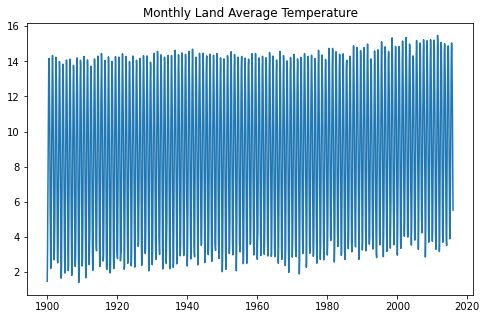

In [6]:
# Monthly temperatures
plt.figure(figsize=(8,5))

plt.plot(df.LandAverageTemperature)
plt.title("Monthly Land Average Temperature")

plt.show()

In [7]:
# Removing seasonality: yearly temperatures
bound = df.LandAverageTemperatureUncertainty.resample("Y").mean()
yearly_temp = df.LandAverageTemperature.resample("Y").mean()

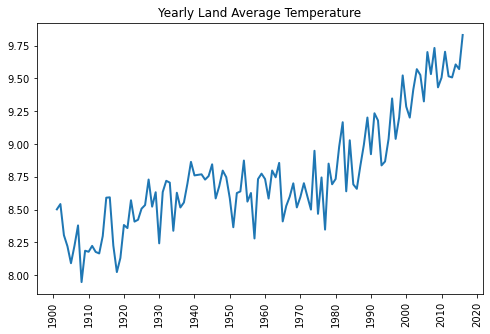

In [8]:
plt.figure(figsize=(8,5))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2)

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.title("Yearly Land Average Temperature")

plt.show()

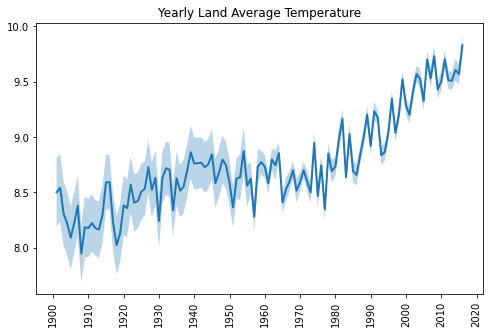

In [9]:
plt.figure(figsize=(8,5))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2)
plt.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.title("Yearly Land Average Temperature")

plt.show()

## Model

### Linear Regression

In [10]:
X = np.arange(len(yearly_temp)).reshape(-1, 1) # need this format
y = yearly_temp

In [11]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression()

In [12]:
lr.coef_, lr.intercept_

(array([0.01069502]), 8.147490126731508)

In [13]:
score = lr.score(X, y)
print(f"The LR score is: {score}")

The LR score is: 0.7188532042948419


In [14]:
y_hat_lr = lr.predict(X)

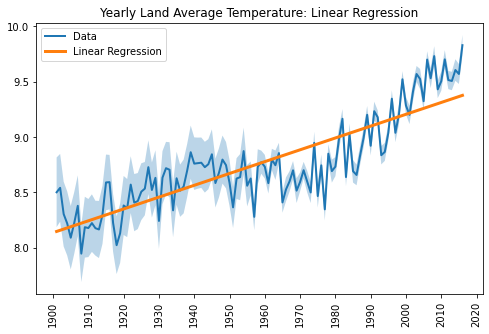

In [15]:
plt.figure(figsize=(8,5))

plt.plot(yearly_temp.index, yearly_temp, linewidth=2, color="C0", label="Data")
plt.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)

plt.plot(yearly_temp.index, y_hat_lr, linewidth=3, color="C1", label="Linear Regression")

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.legend()
plt.title("Yearly Land Average Temperature: Linear Regression")

plt.show()

In [16]:
# Residuals
residuals_lr = y - y_hat_lr
residuals_lr_smooth = savgol_filter(residuals_lr, 36, 3) # window size 36, polynomial order 3

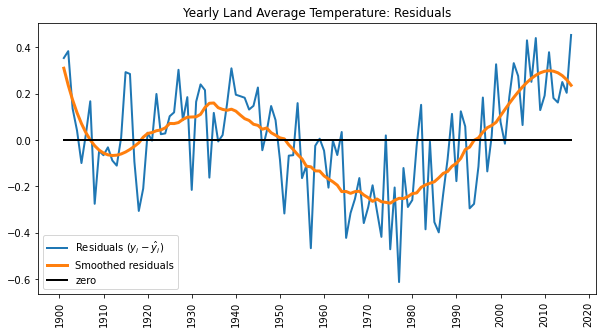

In [17]:
plt.figure(figsize=(10,5))

plt.plot(yearly_temp.index, residuals_lr, linewidth=2, color="C0", label="Residuals ($y_i - \hat y_i$)")
plt.plot(yearly_temp.index, residuals_lr_smooth, linewidth=3, color="C1", label="Smoothed residuals")
plt.plot(yearly_temp.index, 0*residuals_lr, linewidth=2, color="black", label="zero")

plt.xticks(yearly_temp.index, rotation=90)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

plt.legend()
plt.title("Yearly Land Average Temperature: Residuals")

plt.show()

### Support Vector Machine Regression (SVM)

In [18]:
# parameters
parameters = {'degree': [2, 3, 4, 5], "C": np.logspace(-4, 4, num=9)}
# model
svr = SVR()
# grid search with cross-vaidation
svr_cv = GridSearchCV(svr, parameters)
# fit model
svr_cv.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'degree': [2, 3, 4, 5]})

In [19]:
svr_cv.best_params_

{'C': 10.0, 'degree': 2}

In [20]:
svr_cv.score(X, y)

0.8639663495542756

In [21]:
y_hat_svr = svr_cv.predict(X)

In [22]:
#Residuals
residuals_svr = y - y_hat_svr
residuals_svr_smooth = savgol_filter(residuals_svr, 36, 3) # window size 12, polynomial order 3

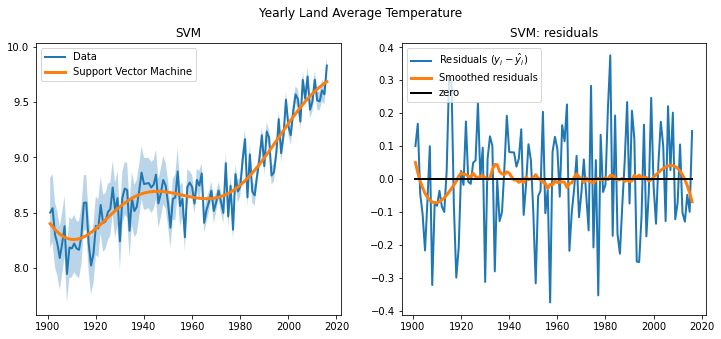

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(yearly_temp.index, yearly_temp, linewidth=2, color="C0", label="Data")
ax1.fill_between(yearly_temp.index, yearly_temp - bound, yearly_temp + bound, alpha=0.3)
ax1.plot(yearly_temp.index, y_hat_svr, linewidth=3, color="C1", label="Support Vector Machine")
ax1.set_title("SVM")
ax1.legend()

ax2.plot(yearly_temp.index, residuals_svr, linewidth=2, color="C0", label="Residuals ($y_i - \hat y_i$)")
ax2.plot(yearly_temp.index, residuals_svr_smooth, linewidth=3, color="C1", label="Smoothed residuals")
ax2.plot(yearly_temp.index, 0*residuals_svr, linewidth=2, color="black", label="zero")
ax2.set_title("SVM: residuals")
ax2.legend()


fig.suptitle("Yearly Land Average Temperature")
plt.show()

### P-Value

**Doc of `stats.linregress`:**<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

>**pvalue : float**<br><br>
The **p-value** for a hypothesis test whose *null hypothesis* is that *the slope is zero*, using Wald Test with t-distribution of the test statistic. See `alternative` above for alternative hypotheses.

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y, alternative="greater")

In [25]:
slope, intercept, r_value, p_value, std_err

(0.010695024282730425,
 8.147490126731508,
 0.847852112278339,
 1.701851480412909e-33,
 0.0006264347077231002)

Dans le cas d'une régression, la **p-valeur** est la probabilité d'obtenir des coefficients au moins aussi extrêmes que ceux observés **sous l'hypothèse nulle (H0)**. Ici, on a:
- $slope = 0.01069502428273042$
- **H0:** pente de la régression = 0, i.e., pas de correlation entre les variables `temps` et `température`

\begin{eqnarray*}
\mathrm{\bf p-value} & = & \mathrm{Pr} \big( slope \geq 0.0106... ~|~ \mathrm{H0} \big) \simeq 3.4 \cdot 10^{-33} \\
& \Rightarrow & \text{rejeter H0, i.e., la pente est non nulle}
\end{eqnarray*}

**CONCLUSION: sur la bases de ces data, il est infiniment probable qu'il y ait réchauffement climatique.** Si vous êtes courageux, je vous invite à examnier d'autres datasets pour essayer de confirmer dans quelle mesure ce réchauffement climatique est lié à l'activité humaine...